In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar

# Convert date in the dataset that python can understand

In [3]:
df = pd.read_csv('CrimesChicago.csv', low_memory=False)
#format my date 
df['Date'] = pd.to_datetime(df['Date'], format= '%m/%d/%Y %I:%M:%S %p')
#turn NAN to zero
df = df.fillna(0) 
#print the five rows of the data
df.head()

ID Case Number                Date                 Block  IUCR  \
0  11034701    JA366925 2001-01-01 11:00:00       016XX E 86TH PL  1153   
1  11227287    JB147188 2017-10-08 03:00:00    092XX S RACINE AVE  0281   
2  11227583    JB147595 2017-03-28 14:00:00       026XX W 79TH ST  0620   
3  11227293    JB147230 2017-09-09 20:17:00  060XX S EBERHART AVE  0810   
4  11227634    JB147599 2017-08-26 10:00:00   001XX W RANDOLPH ST  0281   

          Primary Type                          Description  \
0   DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
1  CRIM SEXUAL ASSAULT                       NON-AGGRAVATED   
2             BURGLARY                       UNLAWFUL ENTRY   
3                THEFT                            OVER $500   
4  CRIM SEXUAL ASSAULT                       NON-AGGRAVATED   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \
0            RESIDENCE   False     False  ...   8.0            45.0        11   
1            RESIDENCE   False     False  ...  21.0            73.0        02   
2                OTHER   False     False  ...  18.0            70.0        05   
3            RESIDENCE   False     False  ...  20.0            42.0        06   
4          HOTEL/MOTEL   False     False  ...  42.0            32.0        02   

   X Coordinate Y Coordinate  Year              Updated On  Latitude  \
0           0.0          0.0  2001  08/05/2017 03:50:08 PM       0.0   
1           0.0          0.0  2017  02/11/2018 03:57:41 PM       0.0   
2           0.0          0.0  2017  02/11/2018 03:57:41 PM       0.0   
3           0.0          0.0  2017  02/11/2018 03:57:41 PM       0.0   
4           0.0          0.0  2017  02/11/2018 03:57:41 PM       0.0   

  Longitude  Location  
0       0.0         0  
1       0.0         0  
2       0.0         0  
3       0.0         0  
4       0.0         0  

[5 rows x 22 columns]

# Drop useless Data 

In [4]:
df.drop(["X Coordinate","Y Coordinate", "Latitude", "Longitude"], axis=1, inplace=True)

#  New Table focusing on Crimes and when it happen 

In [5]:
crime = pd.DataFrame(df)
crime = crime[['Date', 'Primary Type', 'Year']]
crime.head(60)

Date                Primary Type  Year
0  2001-01-01 11:00:00          DECEPTIVE PRACTICE  2001
1  2017-10-08 03:00:00         CRIM SEXUAL ASSAULT  2017
2  2017-03-28 14:00:00                    BURGLARY  2017
3  2017-09-09 20:17:00                       THEFT  2017
4  2017-08-26 10:00:00         CRIM SEXUAL ASSAULT  2017
5  2013-02-10 00:00:00         CRIM SEXUAL ASSAULT  2013
6  2015-01-01 00:01:00  OFFENSE INVOLVING CHILDREN  2015
7  2017-01-01 00:01:00  OFFENSE INVOLVING CHILDREN  2017
8  2017-07-17 10:10:00                       THEFT  2017
9  2017-12-28 15:55:00          DECEPTIVE PRACTICE  2017
10 2017-02-10 12:00:00             CRIMINAL DAMAGE  2017
11 2017-11-22 02:42:00               OTHER OFFENSE  2017
12 2012-01-01 09:00:00          DECEPTIVE PRACTICE  2012
13 2017-07-29 15:40:00                       THEFT  2017
14 2017-01-22 00:01:00  OFFENSE INVOLVING CHILDREN  2017
15 2017-10-14 00:01:00          DECEPTIVE PRACTICE  2017
16 2014-10-15 15:00:00          DECEPTIVE PRACTICE  2014
17 2006-10-17 13:05:00                   NARCOTICS  2006
18 2015-05-30 00:00:00  OFFENSE INVOLVING CHILDREN  2015
19 2015-05-30 00:00:00  OFFENSE INVOLVING CHILDREN  2015
20 2017-07-29 10:00:00                       THEFT  2017
21 2011-12-16 00:00:00          DECEPTIVE PRACTICE  2011
22 2013-05-16 00:00:00          DECEPTIVE PRACTICE  2013
23 2001-07-12 00:01:00         CRIM SEXUAL ASSAULT  2001
24 2007-01-01 00:01:00         CRIM SEXUAL ASSAULT  2007
25 2011-01-01 00:01:00  OFFENSE INVOLVING CHILDREN  2011
26 2013-07-08 16:10:00          DECEPTIVE PRACTICE  2013
27 2017-07-27 01:00:00                       THEFT  2017
28 2014-03-20 09:00:00          DECEPTIVE PRACTICE  2014
29 2015-01-01 00:01:00         CRIM SEXUAL ASSAULT  2015
30 2013-01-01 12:00:00          DECEPTIVE PRACTICE  2013
31 2010-01-01 00:01:00         CRIM SEXUAL ASSAULT  2010
32 2015-01-01 00:01:00                 SEX OFFENSE  2015
33 2015-01-27 00:01:00         CRIM SEXUAL ASSAULT  2015
34 2007-01-01 00:01:00         CRIM SEXUAL ASSAULT  2007
35 2015-04-01 00:01:00         CRIM SEXUAL ASSAULT  2015
36 2015-01-01 00:01:00  OFFENSE INVOLVING CHILDREN  2015
37 2017-06-01 00:01:00  OFFENSE INVOLVING CHILDREN  2017
38 2008-01-01 00:01:00         CRIM SEXUAL ASSAULT  2008
39 2015-01-01 00:01:00         CRIM SEXUAL ASSAULT  2015
40 2016-10-19 19:00:00                    BURGLARY  2016
41 2003-01-01 00:01:00                 SEX OFFENSE  2003
42 2017-10-01 00:00:00  OFFENSE INVOLVING CHILDREN  2017
43 2007-01-01 00:01:00         CRIM SEXUAL ASSAULT  2007
44 2017-09-01 09:00:00                 SEX OFFENSE  2017
45 2018-02-04 15:25:00          DECEPTIVE PRACTICE  2018
46 2001-09-15 02:00:00                     BATTERY  2001
47 2014-09-01 08:00:00          DECEPTIVE PRACTICE  2014
48 2001-11-02 18:30:00                       THEFT  2001
49 2016-03-29 07:00:00          DECEPTIVE PRACTICE  2016
50 2017-12-13 00:01:00                       THEFT  2017
51 2017-12-18 09:00:00          DECEPTIVE PRACTICE  2017
52 2017-02-28 00:00:00         CRIM SEXUAL ASSAULT  2017
53 2016-03-11 23:00:00         CRIM SEXUAL ASSAULT  2016
54 2017-12-14 12:15:00               OTHER OFFENSE  2017
55 2018-02-20 16:21:00                       THEFT  2018
56 2017-11-15 14:00:00          DECEPTIVE PRACTICE  2017
57 2017-11-05 08:00:00                       THEFT  2017
58 2017-01-01 00:01:00  OFFENSE INVOLVING CHILDREN  2017
59 2014-11-01 09:00:00          DECEPTIVE PRACTICE  2014

# The Top 10 Crimes

In [6]:
#group the columns Primary Type abd Year, count them and sort them in dec order
criming = df.groupby(["Primary Type"])[ "Year"].count().sort_values(ascending=False)
#Print the Top 10 crimes
criming[:10]

Primary Type
THEFT                  1497524
BATTERY                1294187
CRIMINAL DAMAGE         804821
NARCOTICS               729499
ASSAULT                 444272
OTHER OFFENSE           440046
BURGLARY                400429
MOTOR VEHICLE THEFT     325755
DECEPTIVE PRACTICE      288168
ROBBERY                 266189
Name: Year, dtype: int64

# Create new columns month, and Days of the week

In [7]:
part_2 = pd.DataFrame(df)
#crime_date.head(60)
#create a column Month and convert my date column to a Month, i.e 1 convert January 
part_2['Month']=part_2['Date'].dt.strftime('%B')
#create a column Days of the week and convert my date column to a Days of the week, i.e 2001-01-01 convert Monday 
part_2['Days of the week']= part_2['Date'].dt.day_name()
#Dop the columns that are useless, so that I can use the data to graph
part_2.drop(["Location", "IUCR", "Case Number","Block", "Location Description",
            "Beat", "FBI Code", "Ward", "Description","Community Area", "District",
            "Updated On"], axis=1, inplace=True)
#print the data
part_2.head()


ID                Date         Primary Type  Arrest  Domestic  Year  \
0  11034701 2001-01-01 11:00:00   DECEPTIVE PRACTICE   False     False  2001   
1  11227287 2017-10-08 03:00:00  CRIM SEXUAL ASSAULT   False     False  2017   
2  11227583 2017-03-28 14:00:00             BURGLARY   False     False  2017   
3  11227293 2017-09-09 20:17:00                THEFT   False     False  2017   
4  11227634 2017-08-26 10:00:00  CRIM SEXUAL ASSAULT   False     False  2017   

       Month Days of the week  
0    January           Monday  
1    October           Sunday  
2      March          Tuesday  
3  September         Saturday  
4     August         Saturday

# Plot of Days of Week for crimes

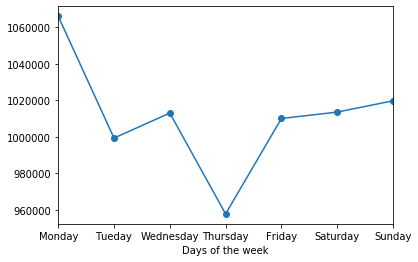

In [8]:
#list that print the days of week
days_of_week = ['Monday','Tueday','Wednesday','Thursday','Friday','Saturday','Sunday']
#group the data with Days of week and my ID.
part_2.groupby('Days of the week')['ID'].count().plot(marker='o')
#x-axis are the 7 days of week
plt.xticks(np.arange(7),days_of_week)
#show the plot
plt.show()

Plotting the Days of week for the crimes, it's interesting because The crime begin to drop off on thurdays and crime raise up again on Friday and continue. It make sense if you think about how people are more likly to people out on the weekends. At UIC I see more reported crimes on the weekends compare to the weekday. But why does crime raise on Wednesday, it could be that people get pay on wednesday.

# Plot of Crimes in a year(Month by Month) 

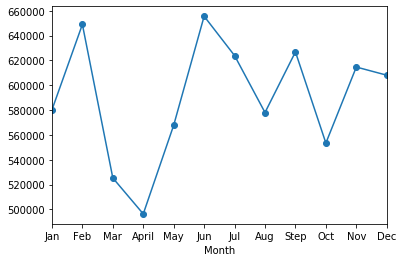

In [9]:
#months holds the lists of months
Months = ['Jan','Feb','Mar','April','May','Jun','Jul', 'Aug', 'Step','Oct', 'Nov', 'Dec']
#data droup the month and ID columns so it could be count and plot
part_2.groupby('Month')['ID'].count().plot(marker='o')
#x-axis are the 12 months in a year
plt.xticks(np.arange(12),Months)
plt.show()

In winter in chicago are usually the worst time to be outside. It's interesting that crimes increase on Feb, I see that crime increase in the summer from May to june. That could be people are going outside more because it's getting hot. But then crime drops and I think the reason is because polices are combatting the increase of crime. In the south side of chicago you see alot of crime happen, but also see a lot of polices around. Crimes increase from Oct to Nov because of the holidays. 

# Plot of Crimes from 12years

The total of crimes reported for chicago in 2001 was equal to 485763
The total of crimes reported for chicago in 2002 was equal to 486762
The total of crimes reported for chicago in 2003 was equal to 475954
The total of crimes reported for chicago in 2004 was equal to 469391
The total of crimes reported for chicago in 2005 was equal to 453722
The total of crimes reported for chicago in 2006 was equal to 448131
The total of crimes reported for chicago in 2007 was equal to 437035
The total of crimes reported for chicago in 2008 was equal to 427082
The total of crimes reported for chicago in 2009 was equal to 392743
The total of crimes reported for chicago in 2010 was equal to 370372
The total of crimes reported for chicago in 2011 was equal to 351847
The total of crimes reported for chicago in 2012 was equal to 336081


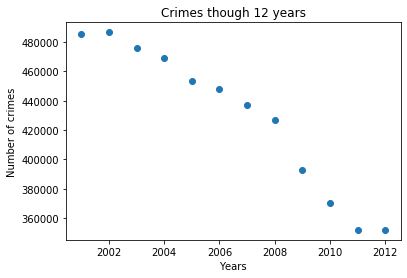

In [12]:
for i in range(2001, 2013):
    total_crime = df["Primary Type"][df["Year"] == i].value_counts().sum()
    print("The total of crimes reported for chicago in " + str(i) + " was equal to " + str(total_crime))

number_crimes = [485763,486762,475954,469391,453722,448131,437035,
                427082,392743,370372,351847,351847]
year = [2001,2002,2003,2004,2005,2006,2007,2008,2009,
        2010,2011,2012]
plt.scatter(year,number_crimes)
plt.xlabel('Years')
plt.ylabel('Number of crimes')
plt.title('Crimes though 12 years')
plt.show()
#plt.plot(year, number_crimes)
#plt.xlabel("Year")
#plt.ylabel("Crimes")

Crimes are slowing decreasing from 2001 to 2012. I think maybe because of technology. As our tech increase for the better it become easier to catch people our comment crimes.

# New Table for Dates, Crimes, Arrest, Domestic and ID

In [11]:
#crimes holds the Dataframe  
crimes = pd.DataFrame(df)
#crimes has only five columns
crimes = crimes[['Date', 'Primary Type', 'Year', 'Arrest','Domestic','ID']]
#crimes print out 60 rows
crimes.head(60)

Date                Primary Type  Year  Arrest  Domestic  \
0  2001-01-01 11:00:00          DECEPTIVE PRACTICE  2001   False     False   
1  2017-10-08 03:00:00         CRIM SEXUAL ASSAULT  2017   False     False   
2  2017-03-28 14:00:00                    BURGLARY  2017   False     False   
3  2017-09-09 20:17:00                       THEFT  2017   False     False   
4  2017-08-26 10:00:00         CRIM SEXUAL ASSAULT  2017   False     False   
5  2013-02-10 00:00:00         CRIM SEXUAL ASSAULT  2013   False     False   
6  2015-01-01 00:01:00  OFFENSE INVOLVING CHILDREN  2015   False      True   
7  2017-01-01 00:01:00  OFFENSE INVOLVING CHILDREN  2017   False     False   
8  2017-07-17 10:10:00                       THEFT  2017   False     False   
9  2017-12-28 15:55:00          DECEPTIVE PRACTICE  2017   False     False   
10 2017-02-10 12:00:00             CRIMINAL DAMAGE  2017   False     False   
11 2017-11-22 02:42:00               OTHER OFFENSE  2017   False      True   
12 2012-01-01 09:00:00          DECEPTIVE PRACTICE  2012   False     False   
13 2017-07-29 15:40:00                       THEFT  2017   False     False   
14 2017-01-22 00:01:00  OFFENSE INVOLVING CHILDREN  2017   False     False   
15 2017-10-14 00:01:00          DECEPTIVE PRACTICE  2017   False     False   
16 2014-10-15 15:00:00          DECEPTIVE PRACTICE  2014   False     False   
17 2006-10-17 13:05:00                   NARCOTICS  2006    True     False   
18 2015-05-30 00:00:00  OFFENSE INVOLVING CHILDREN  2015   False      True   
19 2015-05-30 00:00:00  OFFENSE INVOLVING CHILDREN  2015   False      True   
20 2017-07-29 10:00:00                       THEFT  2017   False     False   
21 2011-12-16 00:00:00          DECEPTIVE PRACTICE  2011   False     False   
22 2013-05-16 00:00:00          DECEPTIVE PRACTICE  2013   False     False   
23 2001-07-12 00:01:00         CRIM SEXUAL ASSAULT  2001   False      True   
24 2007-01-01 00:01:00         CRIM SEXUAL ASSAULT  2007   False     False   
25 2011-01-01 00:01:00  OFFENSE INVOLVING CHILDREN  2011    True      True   
26 2013-07-08 16:10:00          DECEPTIVE PRACTICE  2013   False     False   
27 2017-07-27 01:00:00                       THEFT  2017   False     False   
28 2014-03-20 09:00:00          DECEPTIVE PRACTICE  2014   False     False   
29 2015-01-01 00:01:00         CRIM SEXUAL ASSAULT  2015   False     False   
30 2013-01-01 12:00:00          DECEPTIVE PRACTICE  2013   False     False   
31 2010-01-01 00:01:00         CRIM SEXUAL ASSAULT  2010   False     False   
32 2015-01-01 00:01:00                 SEX OFFENSE  2015   False     False   
33 2015-01-27 00:01:00         CRIM SEXUAL ASSAULT  2015   False     False   
34 2007-01-01 00:01:00         CRIM SEXUAL ASSAULT  2007   False     False   
35 2015-04-01 00:01:00         CRIM SEXUAL ASSAULT  2015   False     False   
36 2015-01-01 00:01:00  OFFENSE INVOLVING CHILDREN  2015   False      True   
37 2017-06-01 00:01:00  OFFENSE INVOLVING CHILDREN  2017   False      True   
38 2008-01-01 00:01:00         CRIM SEXUAL ASSAULT  2008   False      True   
39 2015-01-01 00:01:00         CRIM SEXUAL ASSAULT  2015   False     False   
40 2016-10-19 19:00:00                    BURGLARY  2016   False     False   
41 2003-01-01 00:01:00                 SEX OFFENSE  2003   False     False   
42 2017-10-01 00:00:00  OFFENSE INVOLVING CHILDREN  2017   False     False   
43 2007-01-01 00:01:00         CRIM SEXUAL ASSAULT  2007   False     False   
44 2017-09-01 09:00:00                 SEX OFFENSE  2017   False     False   
45 2018-02-04 15:25:00          DECEPTIVE PRACTICE  2018   False     False   
46 2001-09-15 02:00:00                     BATTERY  2001   False     False   
47 2014-09-01 08:00:00          DECEPTIVE PRACTICE  2014    True     False   
48 2001-11-02 18:30:00                       THEFT  2001   False     False   
49 2016-03-29 07:00:00          DECEPTIVE PRACTICE  2016   False     False   
50 2017-12-13 00:01:00                  

# Plot Domestic

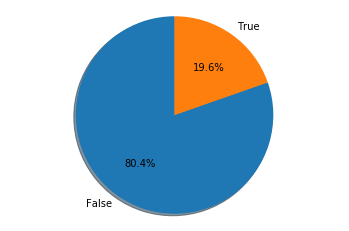

In [28]:
#Plot Domestic true and false
not_arrests = crimes[crimes['Domestic']==True]
not_arrests = not_arrests.groupby('Arrest')['ID'].count().sort_values(ascending=False)
label = 'False', 'True'
explode = (0, 0,)
fig1, ax1 = plt.subplots()
#the pie, which holds the label, and numbers, the color, space, everything that goes in the pie
ax1.pie(not_arrests, explode=explode, labels=label,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#display the pie
plt.show()

Looking at the pie chart we see that Domestic has a higher percent of false compare to true. One thought could be that domestic crimes are harder to prove. Why? I think mainly because there are a lot of domestic crimes so polices maybe not try as hard to get a arrest, or it could just be normal in the community so people don't report the crimes.

# Arrest Crimes

In [29]:
#arrests holds only arrests that's true 
arrests=crimes[crimes['Arrest']==True]
#count the total of crimes that had a arrest
true_arrests = arrests.groupby('Primary Type')['ID'].count().sort_values(ascending=False)
#print the crimes that had a arrest
true_arrests

Primary Type
NARCOTICS                            725283
BATTERY                              293935
THEFT                                177402
CRIMINAL TRESPASS                    146460
ASSAULT                              101464
OTHER OFFENSE                         79431
PROSTITUTION                          68885
WEAPONS VIOLATION                     61558
CRIMINAL DAMAGE                       56561
DECEPTIVE PRACTICE                    45288
PUBLIC PEACE VIOLATION                31987
MOTOR VEHICLE THEFT                   29350
ROBBERY                               25729
BURGLARY                              22972
INTERFERENCE WITH PUBLIC OFFICER      15738
GAMBLING                              14467
LIQUOR LAW VIOLATION                  14221
OFFENSE INVOLVING CHILDREN            10126
SEX OFFENSE                            7983
HOMICIDE                               4778
CRIM SEXUAL ASSAULT                    4526
ARSON                                  1505
KIDNAPPING         

# Arrest Mean

In [262]:
true_arrests.mean()

55516.0

# Plot of Top five crimes

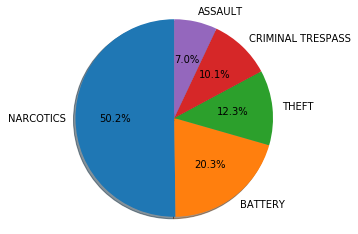

In [24]:
#domestic = 'ASSAULT', 'BATTERY','CRIM SEXUAL ASSAULT', 'DOMESTIC VIOLENCE ''KIDNAPPING','SEX OFFENSE'
#            , 'OFFENSE INVOLVING CHILDREN', 

#domestic holds the labels for the pie chart
domestic = 'NARCOTICS', 'BATTERY','THEFT','CRIMINAL TRESPASS','ASSAULT'
#domestic_Num holds the Domestic crimes that were arrest, and Non domestic crimes arrest
#domestic_Num = [441763,1501297]
domestic_Num = [725283,293935, 177402,146460, 101464]
# the space between each other
explode = (0, 0,0,0,0)
fig1, ax1 = plt.subplots()
#the pie, which holds the label, and numbers, the color, space, everything that goes in the pie
ax1.pie(domestic_Num, explode=explode, labels=domestic,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#display the pie
plt.show()

Looking at the graph we see that Narcotics have more arrests than the other crimes. Narcotics has the highest arrests count, I think that's because Narcotics are easier to find on people than other crimes. And I would think more people are selling Narcotics more, because it's easy to get your hands on.

# Non-Arrest crimes 

In [16]:
not_arrests = crimes[crimes['Arrest']==False]
false_arrests = not_arrests.groupby('Primary Type')['ID'].count().sort_values(ascending=False)
false_arrests.head(60)

Primary Type
THEFT                                1320122
BATTERY                              1000252
CRIMINAL DAMAGE                       748260
BURGLARY                              377457
OTHER OFFENSE                         360615
ASSAULT                               342808
MOTOR VEHICLE THEFT                   296405
DECEPTIVE PRACTICE                    242880
ROBBERY                               240460
CRIMINAL TRESPASS                      55579
OFFENSE INVOLVING CHILDREN             38503
CRIM SEXUAL ASSAULT                    24911
SEX OFFENSE                            18875
PUBLIC PEACE VIOLATION                 17684
WEAPONS VIOLATION                      17017
ARSON                                  10134
KIDNAPPING                              6129
HOMICIDE                                5335
NARCOTICS                               4216
INTIMIDATION                            3440
STALKING                                3068
INTERFERENCE WITH PUBLIC OFFICER        13

# Non Arrest Mean

In [16]:
false_arrests.mean()

151071.5588235294

# Plot of Arrest and Non-Arrest

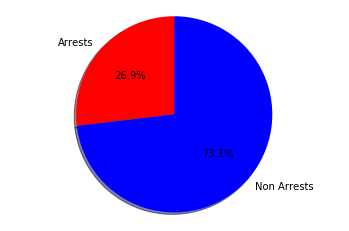

In [143]:
#The mean for both Arrest and Non Arrest crimes
Arrests_percent = [55516.0, 151071.5588235294]
#Color of the pie chart
colors = ['Red','Blue']
#Label for each ind
Label = 'Arrests', 'Non Arrests'
explode = (0, 0)
fig1, ax1 = plt.subplots()
#the pie, which holds the label, and numbers, the color, space, everything that goes in the pie
ax1.pie(Arrests_percent, explode=explode, labels=Label, colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#display pie
plt.show()

In the graph above you will notice that more crimes are not being Arrested. I also notices that the crimes that's hard to prove have more non-arrest count. For example MOTOR VEHICLE THEFT has a lot more non arrest than arrest. If the crime can't be easly solve than more crimes will go not being solved. Another reason can be that alot of these crimes just happen in chicago, and polices may not take these crimes as serious because they happen a lot.

# The locations with high crime-rate throughout the years

In [202]:
#grouping year and Ward
#this should display the year and the total incident occurred  that happen in that year
df.groupby('Year')['Ward'].count().sort_values(ascending=False)

Year
2002    486762
2001    485763
2003    475954
2004    469391
2005    453722
2006    448131
2007    437035
2008    427082
2009    392743
2010    370372
2011    351847
2012    336081
2013    307228
2014    275448
2016    269307
2017    268518
2018    267935
2015    264334
2019    258589
2020     33251
Name: Ward, dtype: int64

# Plot The locations with high crime-rate

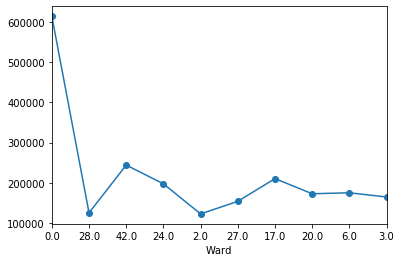

In [198]:
#ward holds the Top ten wards
ward = [0.0,28.0,42.0,24.0, 2.0,27.0,17.0,20.0,6.0,3.0]
#ward holds the Top ten wards
#ward_year = [2001,2002,2003,2004,2005,2006,2007,2009,2009, 2010]
#temp_Loc holds the the years and the total ward for each year
temp_Loc = df.groupby('Ward')['Year'].count()
#Print the top ten
temp_Loc = temp_Loc[:9]
#plot temp_Loc
temp_Loc.plot(marker='o')
#x-axis are the years
plt.xticks(np.arange(10),ward)
#plot ward
plt.show()

#print(str(temp_Loc))

Crimes was the highest in 0.0, and had a significantly drop in 28.0. I would think that ward 28.0, and 2.0 is safer because it's in a diiferent area. Ward 42.0 is the second highest, but no where near ward 0.0. Maybe ward 0.0 is so high, because it's next to rival gangs. Being next to a rival gang could be a big factor in increase crimes in a area.

In [19]:

top_Crime = df.groupby('Primary Type')['ID'].count().sort_values(ascending=False)
#top crime holds the top five crimes
top_Crime = top_Crime[:5]
top_Crime 

Primary Type
THEFT              1497524
BATTERY            1294187
CRIMINAL DAMAGE     804821
NARCOTICS           729499
ASSAULT             444272
Name: ID, dtype: int64

# Arrest made in the year

In [181]:
#My arrests are only True
arrest=part_2[part_2['Arrest']==True]
#count my Arrest's that true with the Month column
true_arrests_M = arrest.groupby('Month')['Arrest'].value_counts()
#print the Arrests
true_arrests_M


Month      Arrest
April      True      162980
August     True      171527
December   True      139631
February   True      151691
January    True      164816
July       True      169945
June       True      164366
March      True      169415
May        True      171168
November   True      150615
October    True      163780
September  True      163126
Name: Arrest, dtype: int64

# Plot Arrest made in the year

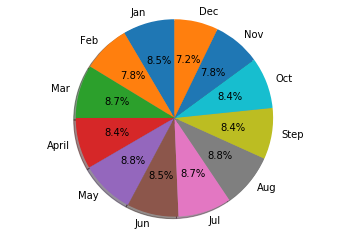

In [166]:
#True holds the arrests that's would made in the year
true = [164816, 151691,169415,162980, 171168, 164366, 169945,171527, 163126, 163780, 150615, 139631 ]
#Months are the list in a year
Months
explode = (0, 0,0,0,0,0,0,0,0,0,0,0)
fig1, ax1 = plt.subplots()
#the pie, which holds the label, and numbers, the color, space, everything that goes in the pie
ax1.pie(true, explode=explode, labels=Months,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

What's interesting is arrest thoughout the year is mostly the same. Dec has the smallest arrest percent, but it's not by that much. I also would had thought that crimes in the suumer of chicago whould invrease by a lot. The highest arrest is in Aug, and it's not by a lot; just one percent. What's interesting is I think polices are just not arresting people commentting crimes as much, I don't know why that is; maybe people just don't inform polices when they see a crime. 

# Top five Burglary Location 

In [180]:
#Looking for crimes that's only Burglary
arrest_Loc=df[df['Primary Type']=='BURGLARY']
#group my crime and the Location it happen, because the crime I'm looking at is Burglary
#the location will only be locations where Burglary crimes happen
top_5_BURGLARY=arrest_Loc.groupby('Primary Type')['Location Description'].value_counts()
#print the top five Burglary Location
top_5_BURGLARY[:5]

Primary Type  Location Description
BURGLARY      RESIDENCE               136748
              APARTMENT               115360
              RESIDENCE-GARAGE         69721
              OTHER                    14497
              SMALL RETAIL STORE        8936
Name: Location Description, dtype: int64

# Plot of Top five Burglary Location 

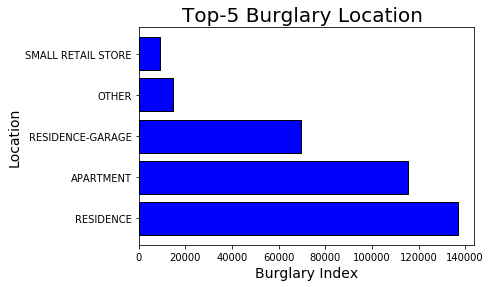

In [23]:
burglary_Loc = ['RESIDENCE','APARTMENT','RESIDENCE-GARAGE', 'OTHER', 'SMALL RETAIL STORE']
curglary_count = [136748,115360,69721,14497,8936]
pos = np.arange(len(burglary_Loc))
plt.barh(pos,curglary_count,color='blue',edgecolor='black')
plt.yticks(pos, burglary_Loc)
plt.xlabel('Burglary Index', fontsize=14)
plt.ylabel('Location', fontsize=14)
plt.title('Top-5 Burglary Location ',fontsize=20)
plt.show()

In this graph two things stick out, Residences being the highest number of Burglarylocations; and Small Retail stores having a low count. Most burglaries happen between 6:AM-6:PM when people are at work. In that case it make since residences are the highest. Apartments is the second highest, I would think apartments is the second because there may be more people in houses than apartments. I would like to know what's other, because small retail store is the lowest.  